In [ ]:
!./setup.sh

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Generator, Tuple

import torch
from torch.utils.data import Dataset, DataLoader

%load_ext autoreload
%autoreload 2
from scripts.lib import read_dir, get_size

## Loading data files into Datasets

In [3]:
fake_train_imgs = read_dir("../data/real_vs_fake/real-vs-fake/train/fake")
real_train_imgs = read_dir("../data/real_vs_fake/real-vs-fake/train/real")

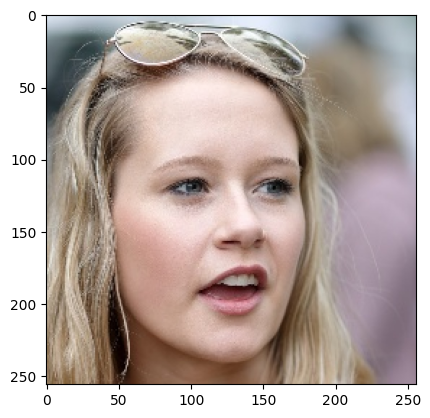

In [4]:
plt.imshow(next(iter(real_train_imgs)))

In [24]:
class FacesDataSet(Dataset):
    """
        fake: 0, real: 1
    """
    def __init__(self, data: Tuple[Generator, Generator], size: int) -> None:
        self.data = data
        self.size = size
        self.counter = 0

    def __len__(self) -> int:
        return self.size
    
    def __getitem__(self, idx: int) -> Tuple[np.ndarray, int]:
        if self.counter <= self.size // 2:
            self.counter += 1
            return (next(iter(self.data[0])), 0)
        else:
            self.counter += 1
            return (next(iter(self.data[1])), 1)

In [29]:
size = get_size('../data/real_vs_fake/real-vs-fake/train')
train_loader = DataLoader(FacesDataSet((fake_train_imgs, real_train_imgs), size), shuffle=True)

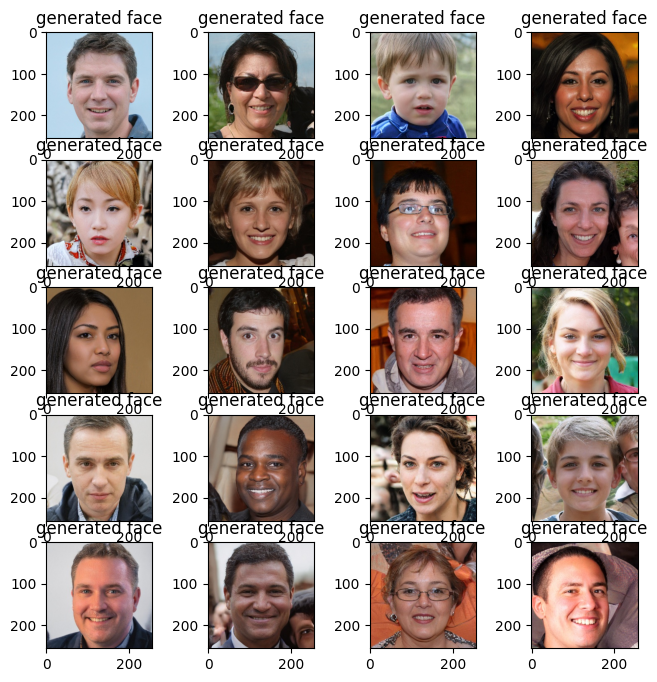

In [38]:
w, h = 10, 10
fig = plt.figure(figsize=(8, 8))
columns, rows = 4, 5

for i in range(1, columns * rows + 1):
    face, label = next(iter(train_loader))
    fig.add_subplot(rows, columns, i)
    plt.title("generated face" if label == 0 else "real face")
    plt.imshow(face.squeeze())

plt.show()

torch.Tensor